<a href="https://colab.research.google.com/github/Steffenanderson/HR-Analytics/blob/main/HR_Analytics_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics - Employee Attrition

Problem Statement

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is harmful to the company, for the following reasons -

1. The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners

2. A sizeable department has to be maintained, to recruit new talent

3. More often than not, the new employees have to be trained for the job and/or given time to acclimatize themselves to the company

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, to curb attrition. In other words, they want to know what changes they should make to their workplace, to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

The task is to create a detailed presentation to HR executives that describes trends in their employee data related to attrition.

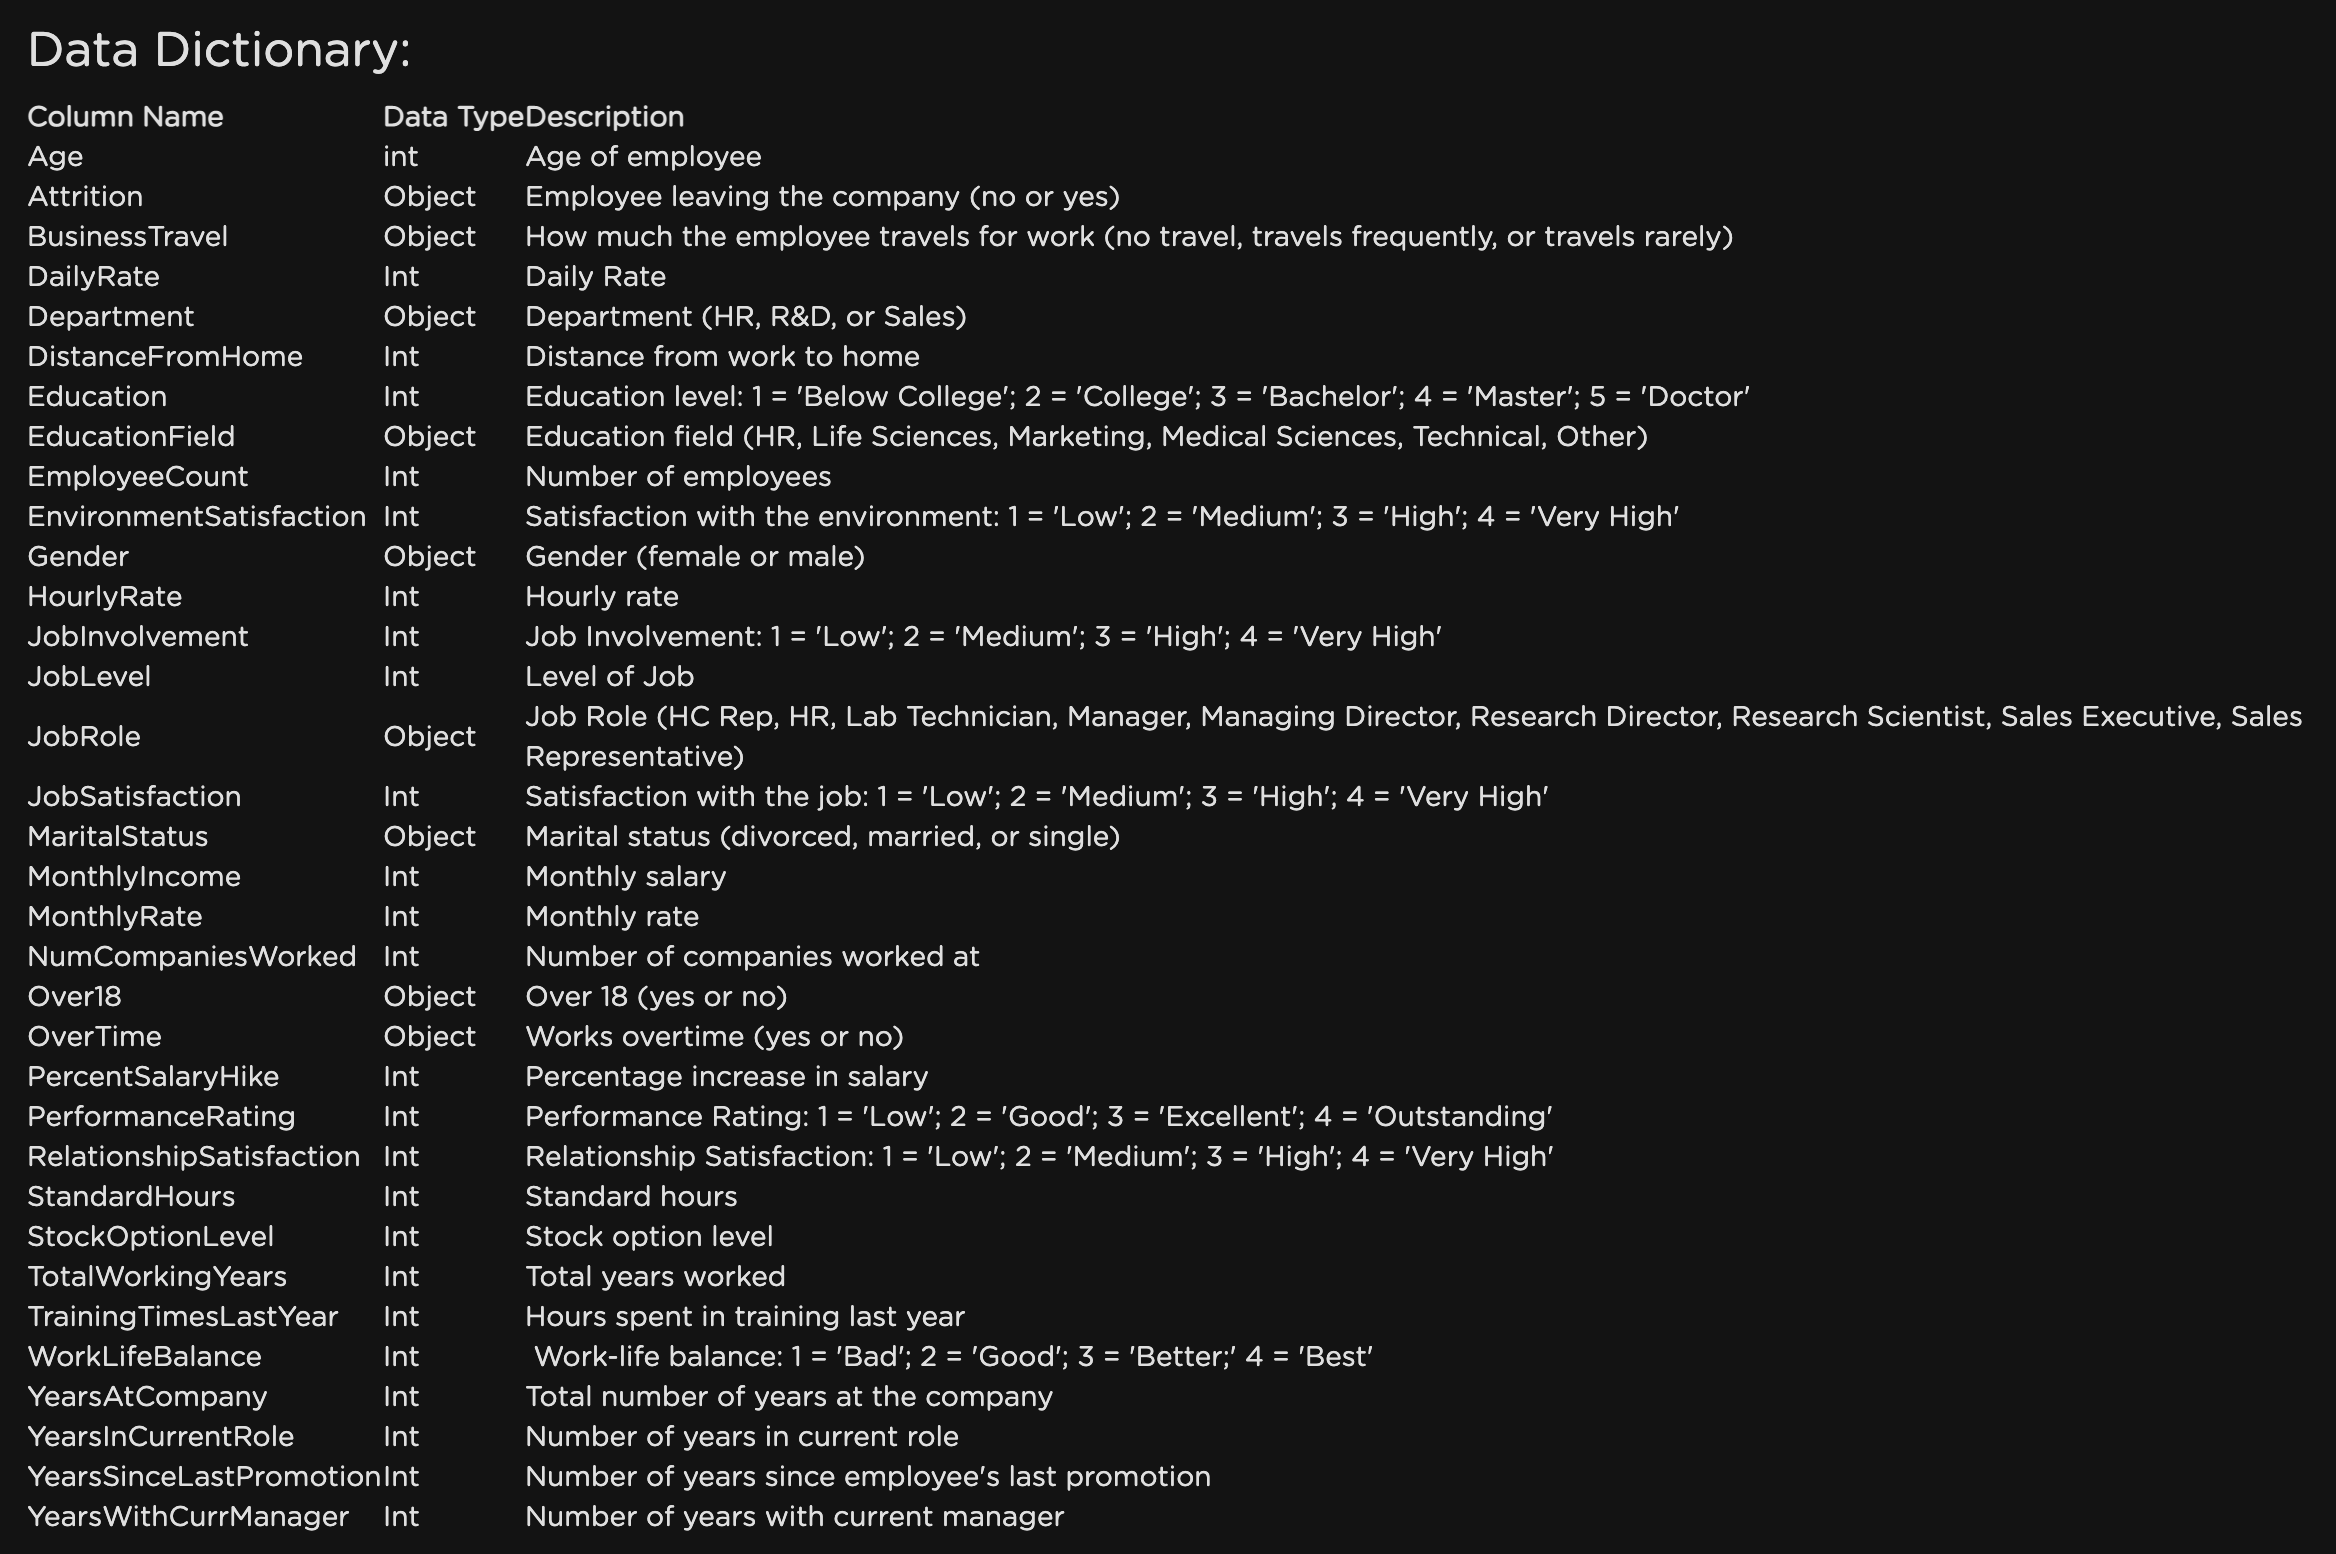

# Import Libraries and Mount Data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/HR Analytics - Employee Attrition/employee_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,NaN,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,NaN,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,NaN,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis (EDA)

**Data Cleaning** 

*   DataFrame Characteristics
*   Identify Missing Data
*   Impute Method & Rationale
*   Set Index
*   Create EDA DataFrame( 'clean_df' )

**DataFrame Characteristics**

In [28]:
# check for data types
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [29]:
# review basic statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [30]:
# list of categorical features
cat_col = []
for x in data.dtypes.index:
  if data.dtypes[x] == 'object':
      cat_col.append(x)
cat_col

# cat_col review
for col in cat_col:
  print(col)
  print(data[col].value_counts())
  print()

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender
Female    588
Name: Gender, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [31]:
# unique count 
data.apply(lambda x: len(x.unique()))

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**Identify Missing Data**

In [32]:
# check for missing data
total_df = raw_df.isnull().sum().sort_values(ascending=False)
percent_missing1 = raw_df.isnull().sum()/raw_df.isnull().count() * 100
percent_missing2 = (round(percent_missing1, 1)).sort_values(ascending=False)
missing_table = pd.concat([total_df, percent_missing2,],
                          axis=1, keys=['Total','% Missing'])
missing_table.head(1)

,Total,% Missing
YearsWithCurrManager,0,0.0


**Impute Method & Rationale**

**Post-Review Assumptions**

* All 60% of 'Gender' data is missing at random (No column correlation given the data dictionary)
* Gender is described as Male or Female

**Solution**
* Implement 'Male' for all NaN (60 - 40% split is practical)


In [33]:
data.Gender.isnull() 

0       False
1        True
2        True
3       False
4        True
        ...  
1465     True
1466     True
1467     True
1468     True
1469     True
Name: Gender, Length: 1470, dtype: bool

In [34]:
data.Gender.fillna('Male', inplace=True)

In [35]:
data.Gender.isnull().sum()

0

**Set Index**

The ‘EmployeeNumber’ column should be the index of the dataframe, not an additional column.

In [36]:
data = data.set_index('EmployeeNumber')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Create EDA DataFrame ( 'clean_df' )**

In [41]:
clean_df = pd.DataFrame(data)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

**Exploratory Data Analysis**

*   Is there a relationship between employee attrition and the distance they live from work?
*   Is there a relationship between employee attrition and Job Role?
*   Is there a relationship between employee attrition and Environment Satisfaction in the Research & Development Departement?
*   Based on the data, what steps can HR take to minimize attrition?


1. Is there a relationship between employee attrition and the distance they live from work?

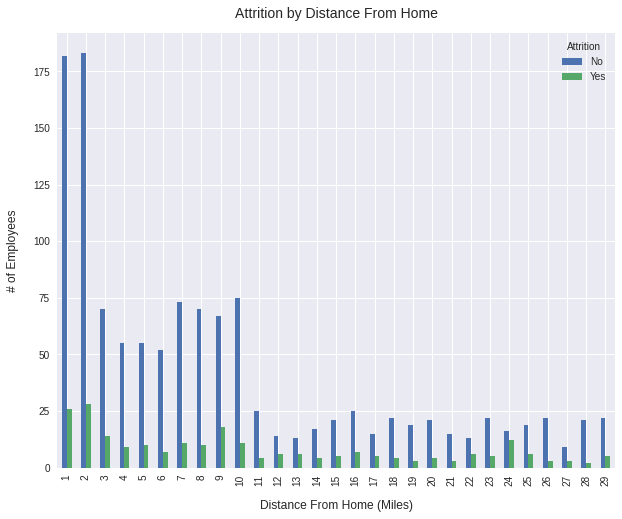

In [42]:
table = pd.pivot_table(clean_df, values=('EmployeeCount'),index=('DistanceFromHome'), columns=('Attrition'), aggfunc= 'sum')
table.plot(kind='bar', figsize=(10, 8))
plt.style.use('seaborn')
plt.xlabel('Distance From Home (Miles)', fontsize = 12, labelpad=14)
plt.ylabel('# of Employees', fontsize = 12, labelpad=14)
plt.title('Attrition by Distance From Home', fontsize = 14, y=1.02);
plt.savefig('Attrition by Distance From Home1.png');
plt.show();

**Observations**

*   The majority of employees that stayed with the company (Attrition: 'No') live between 0 and 10 miles
*   The majority of employees that have left the company (Attrition: 'Yes') lived between 0 and 10 miles

**Key Takeaways**

*   Low correlation between the number of employees that left the company (Attrition: 'Yes) and distance the office was from their home




2. Is there a relationship between employee attrition and Job Role?


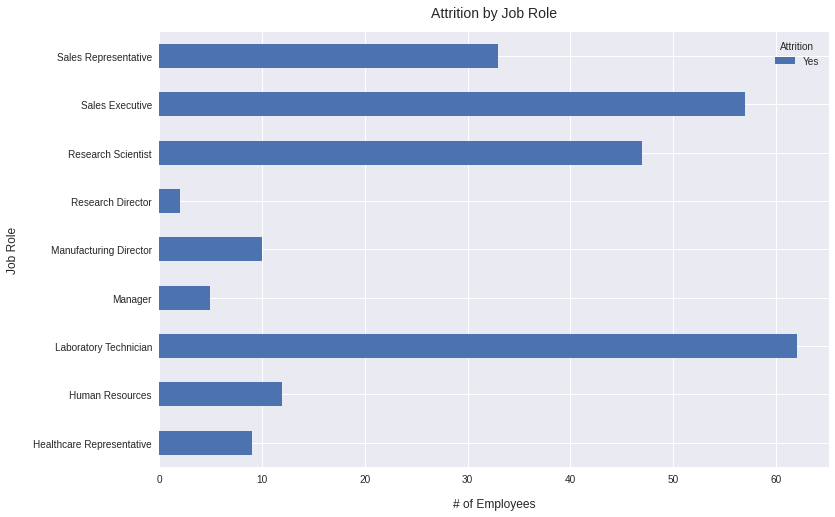

In [39]:
attrition_yes = clean_df[clean_df.Attrition == 'Yes'].sort_values(by= 'JobRole')
attrition_yes

table2 = pd.pivot_table(attrition_yes, values=('EmployeeCount'),index=('JobRole'), columns=('Attrition'), aggfunc= 'sum')
table2.plot(kind='barh', figsize=(12, 8))
plt.style.use('seaborn')

plt.xlabel('# of Employees', fontsize = 12, labelpad=14)
plt.ylabel('Job Role', fontsize = 12, labelpad=14)
plt.title('Attrition by Job Role', fontsize = 14, y=1.02);
plt.savefig('Attrition by Job Role',bbox_inches='tight');
plt.show();

**Observations**

*   The majority of employees that left the company (Attrition: 'Yes') worked as Labortory Technicians (62), Sales Executives (57), and Research Scientist (47)

**Key Takeaways**

*   There is a high concentration of attrition at the company in the Research & Development department (Labortory Technicians and Research Scientist)

3. Is there a relationship between employee attrition and Environment Satisfaction in the Research & Development Departement?

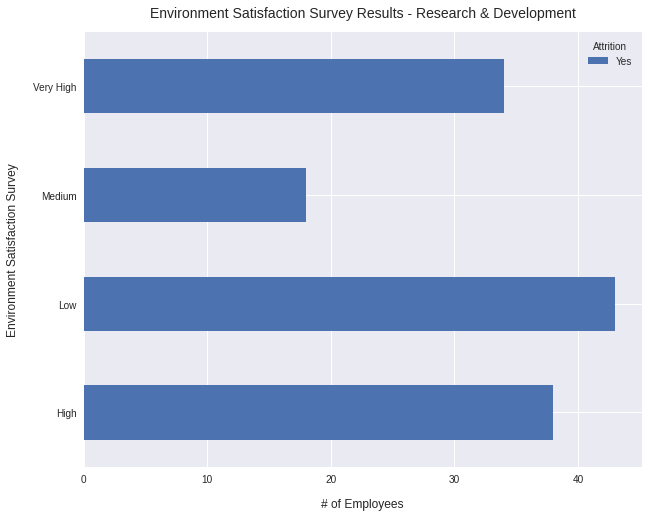

In [40]:
clean_df['EnvironmentSatisfaction'] = clean_df['EnvironmentSatisfaction'].replace({1:'Low',
                                                              2:'Medium',
                                                              3:'High',
                                                              4:'Very High'})

clean_df

attrition_yes = clean_df[(clean_df.Attrition == 'Yes') & (clean_df.Department == 'Research & Development')]
attrition_yes.head()

table2 = pd.pivot_table(attrition_yes, values=('EmployeeCount'),index=('EnvironmentSatisfaction'), columns=('Attrition'), aggfunc= 'sum')
table2.plot(kind='barh', figsize=(10, 8))
plt.style.use('seaborn')

plt.xlabel('# of Employees', fontsize = 12, labelpad=14)
plt.ylabel('Environment Satisfaction Survey', fontsize = 12, labelpad=14)
plt.title('Environment Satisfaction Survey Results - Research & Development', fontsize = 14, y=1.02);
plt.savefig('Environment Satisfaction Survey Results - Research & Development');
plt.show();

**Observations**

*   The majority of employees that left the company (Attrition: 'Yes') in the Research & Development Department reported a 'Low' rating on the Environment Satisfaction Survey

**Key Takeaways**

*   Recommendation: Increase the Environment Satisfaction in the Research & Development department to lower the attrition rate

**Citations**


https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma/

https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

https://towardsdatascience.com/a-step-by-step-guide-to-pandas-pivot-tables-e0641d0c6c70